In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

In [13]:
start = datetime.datetime(2013, 11, 1)
end = datetime.datetime(2023, 11, 1)

In [18]:
# Bank of America
BAC = yf.download("BAC",  start, end)

# CitiGroup
C = yf.download("C",  start, end)

# Goldman Sachs
GS = yf.download("GS", start, end)

# JPMorgan Chase
JPM = yf.download("JPM", start, end)

# Morgan Stanley
MS = yf.download("MS",  start, end)

# Wells Fargo
WFC = yf.download("WFC", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker    BAC                                                    C   
Stock Info    Open   High    Low  Close  Adj Close    Volume       Open   
Date                                                                      
2013-11-01   14.00  14.10  13.96  14.02  11.672969  75610400  48.869999  \
2013-11-04   14.09  14.12  14.00  14.04  11.689618  53063200  48.840000   
2013-11-05   13.99  14.02  13.90  13.93  11.598033  71809700  48.500000   
2013-11-06   13.99  14.02  13.91  13.96  11.623011  66712900  48.759998   
2013-11-07   14.00  14.03  13.80  13.80  11.489796  80775000  48.930000   

Bank Ticker                                   ...         MS              
Stock Info        High        Low      Close  ...        Low      Close   
Date                                          ...                         
2013-11-01   49.020000  48.610001  48.740002  ...  28.850000  29.200001  \
2013-11-04   49.139999  48.580002  48.630001  ...  29.080000  29.340000   
2013-11-05   48.619999  48.230000  48.380001  ...  28.969999  28.990000   
2013-11-06   48.820000  48.389999  48.619999  ...  28.940001  29.129999   
2013-11-07   49.130001  48.349998  48.349998  ...  28.690001  28.719999   

Bank Ticker                             WFC                                    
Stock Info   Adj Close    Volume       Open       High        Low      Close   
Date                                                                           
2013-11-01   22.828865  14964200  42.720001  43.040001  42.580002  42.669998  \
2013-11-04   22.938326  12224300  42.750000  42.840000  42.529999  42.700001   
2013-11-05   22.664686  11053100  42.669998  42.820000  42.500000  42.630001   
2013-11-06   22.774136   8972300  42.619999  42.639999  42.270000  42.439999   
2013-11-07   22.453598  14274200  42.560001  42.599998  41.709999  41.709999   

Bank Ticker                       
Stock Info   Adj Close    Volume  
Date                              
2013-11-01   31.740086  15538700  
2013-11-04   31.762403  11921600  
2013-11-05   31.710321  16603700  
2013-11-06   31.792723  14751500  
2013-11-07   31.245869  22432500  

[5 rows x 36 columns]

In [21]:
# highest close price for each of the stocks in teh defined period:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     49.380001
C       81.910004
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

In [22]:
# create new df with returns for each stock:
returns = pd.DataFrame()

In [23]:
for tick in tickers:
    returns[tick + ' return'] = bank_stocks[tick]['Close'].pct_change()

In [24]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2013-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-04,0.001426,-0.002257,0.006850,-0.008951,0.004794,0.000703
2013-11-05,-0.007835,-0.005141,-0.007416,-0.001729,-0.011929,-0.001639
2013-11-06,0.002154,0.004961,0.009694,0.002887,0.004829,-0.004457
2013-11-07,-0.011461,-0.005553,-0.023728,-0.008637,-0.014075,-0.017201


In [25]:
import seaborn as sns

c:\Users\naomi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


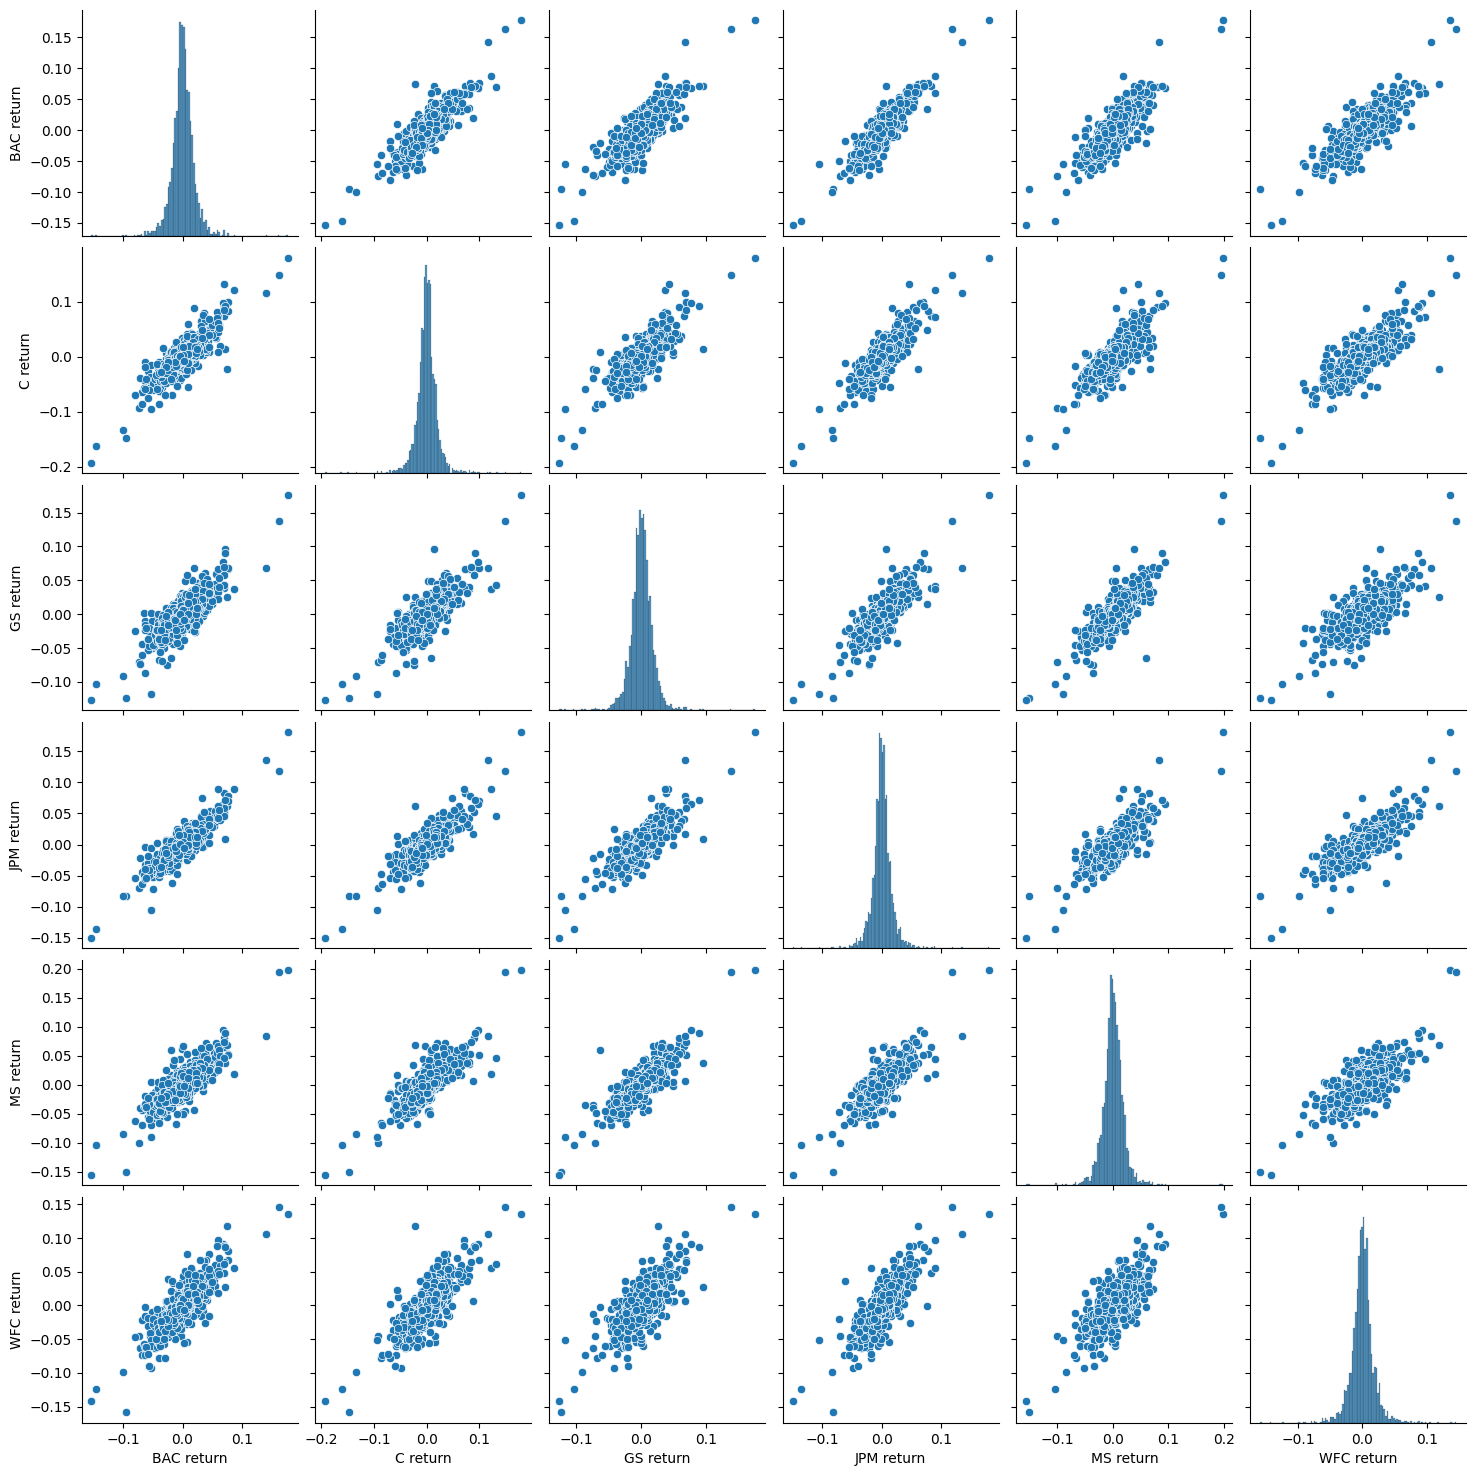

In [26]:
# pairplot returns excluding first data point:
sns.pairplot(returns[1:])

In [27]:
# date with lowest return for each stock:
returns.idxmin()

BAC return   2020-03-16
C return     2020-03-16
GS return    2020-03-16
JPM return   2020-03-16
MS return    2020-03-16
WFC return   2020-03-12
dtype: datetime64[ns]

In [29]:
# We see that the lowest return for 5/6 of the stocks was on the same day - March 16th 2020 cnbc article quote:
#"March 16, 2020, was the day Covid got very real for market investors. It was the week everyone realized that we would be in for a prolonged shutdown."

In [30]:
# Best single day gain:
returns.idxmax()

BAC return   2020-03-13
C return     2020-03-13
GS return    2020-03-13
JPM return   2020-03-13
MS return    2020-03-13
WFC return   2020-03-24
dtype: datetime64[ns]

In [31]:
# The uptick in stocks on this day was a result of the statements Donald Trump gave in the coronvirus press conference which was later followed with record drops (see above on march 16th)

In [32]:
# standard deviation of stock returns:
returns.std()

BAC return    0.019476
C return      0.020362
GS return     0.017693
JPM return    0.017026
MS return     0.019458
WFC return    0.019098
dtype: float64

In [34]:
# Citi group has the highest risk profile over the entire period examined

In [37]:
# examine the riskiest stock in 2020:
beg = '2020-01-01'
ed = '2020-12-31'
returns.loc[beg:ed].std()

BAC return    0.036933
C return      0.042502
GS return     0.032929
JPM return    0.034272
MS return     0.036164
WFC return    0.038573
dtype: float64

In [38]:
# Citi group is also the most volatile in 2020

<ipython-input-41-0d546c3bb5a3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc[beg : ed]['MS return'],color='green',bins=100)


<Axes: xlabel='MS return', ylabel='Density'>

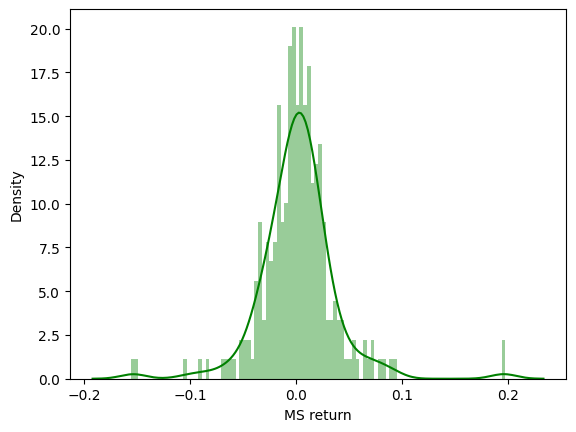

In [41]:
# Create distplot for Morgan Stanley stock in 2020:
sns.distplot(returns.loc[beg : ed]['MS return'],color='green',bins=100)

<ipython-input-42-32655d8c9fe9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc[beg : ed]['C return'],color='red',bins=100)


<Axes: xlabel='C return', ylabel='Density'>

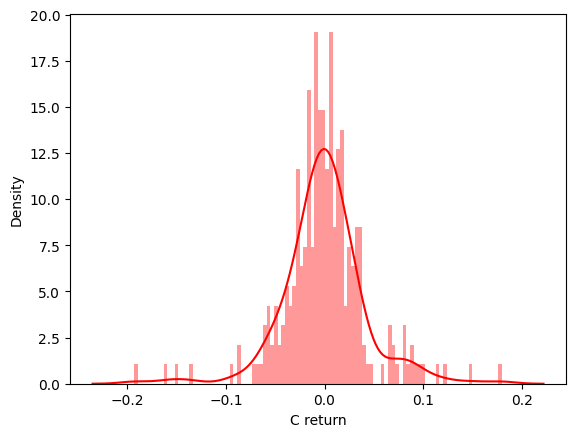

In [42]:
# plot 2020 returns for CitiGroup:
sns.distplot(returns.loc[beg : ed]['C return'],color='red',bins=100)

In [44]:
# import visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()

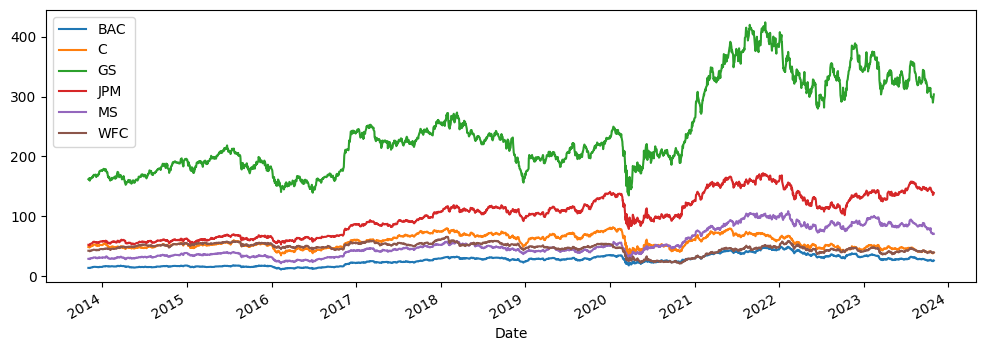

In [45]:
#  Create a line plot showing Close price for each bank for the entire index of time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()

<Axes: xlabel='Date'>

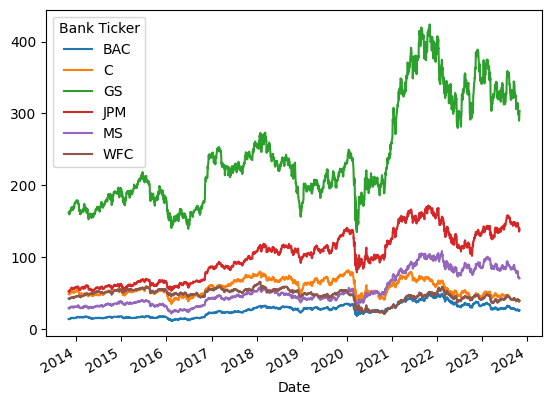

In [47]:
# cross section of data:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

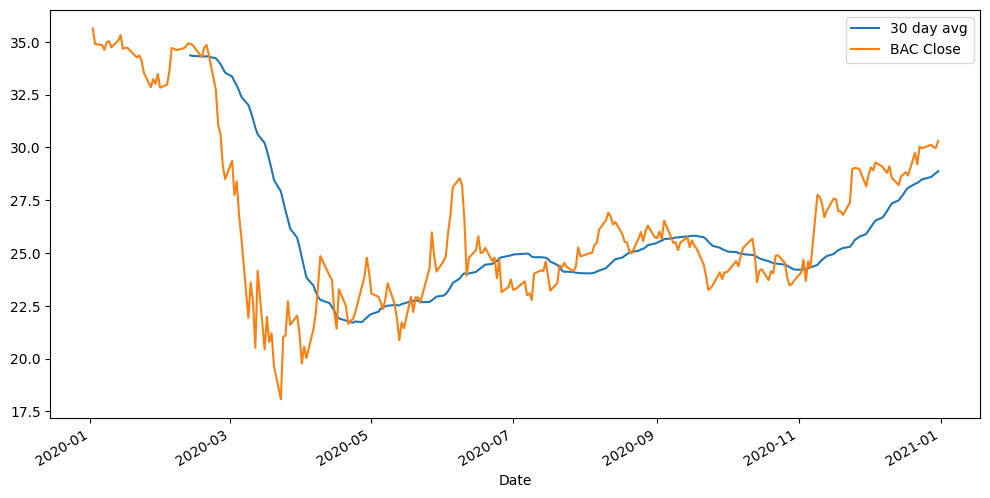

In [50]:
#  Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2020
plt.figure(figsize=(12,6))
BAC['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label= '30 day avg')
BAC['Close'].loc['2020-01-01':'2021-01-01'].plot(label= 'BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

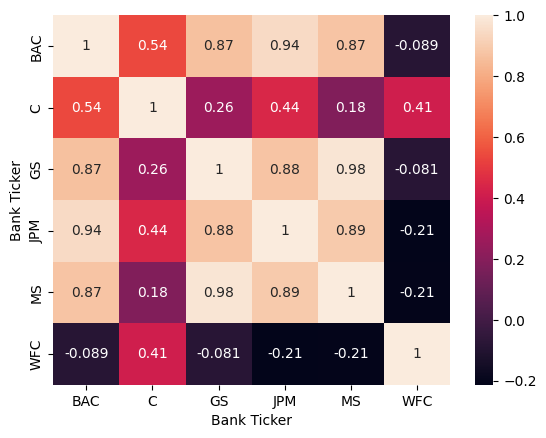

In [55]:
# Create a heatmap of the correlation between the stocks Close Price:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

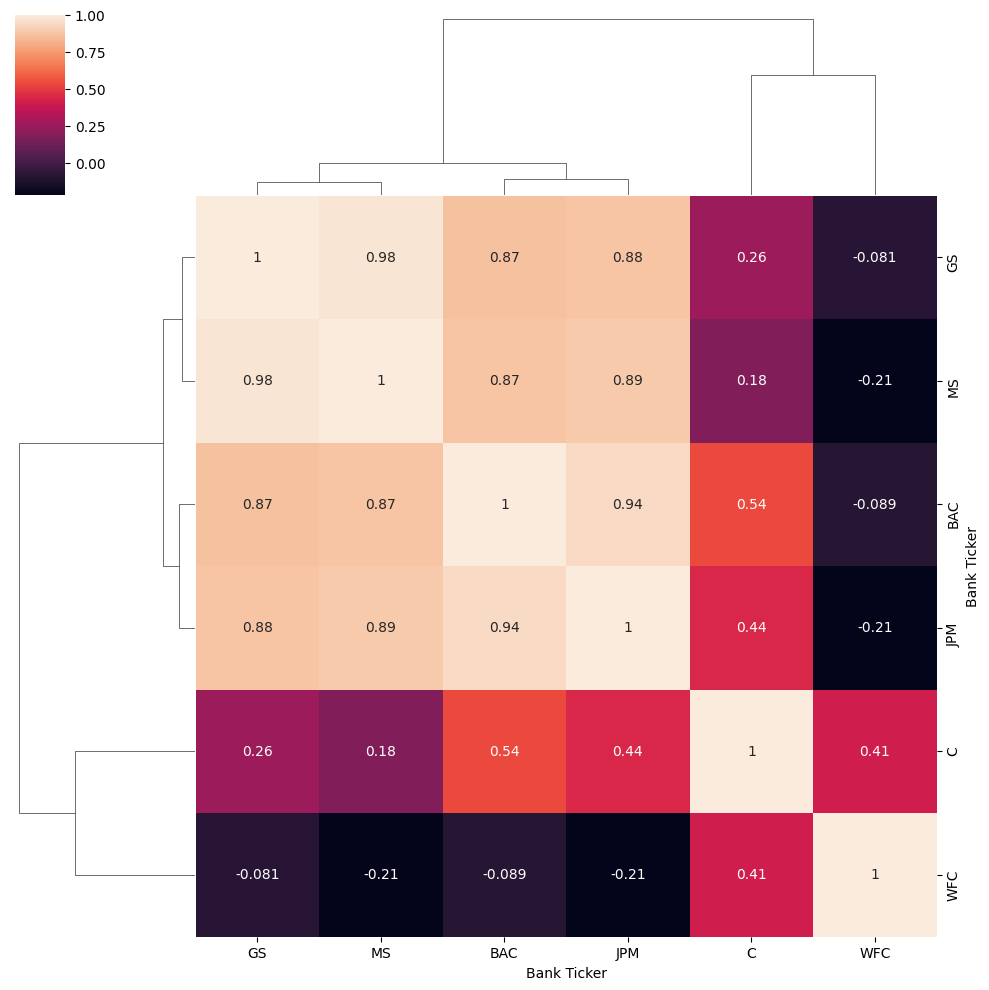

In [56]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)